# CSE475 HW2, Problem 3: K Nearest Neighbors

## Introduction

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K Nearest Neighbors (KNN) classifier to predict customer churn based on account characteristics.

In [1]:
from __future__ import print_function
import os
import numpy as np

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [2]:
import pandas as pd

# Import the data using the file path
filepath = 'Orange_Telecom_Churn_Data.csv'
data = pd.read_csv(filepath)

In [3]:
data.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [4]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [5]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that KNN requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [6]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [7]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.

In [8]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'churned']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['churned']

In [9]:
# To convert pandas to numpy array uncomment below lines

import numpy as np
X_data = X_data.values
y_data = y_data.values

## Question
Write a KNeighborsClassifier predict function (knn_predict) from scratch without using sklearn library [10pts].
The function should take k (the number of neighbors), X_data, y_data as input and makes predicitions on X_data.
Please use L2 distance (distance by the L2 norm) for KNN. X_data and y_data generated in the previous step will be fed to the knn_predict function below. The knn_predict function will use each data point in X_data as a test data point and use the entire X_data, y_data as the training data, and produce the label of the test data point by KNN. The output of this function is the predicted labels of all points in X_data.


In [17]:
y_data.shape

(1400,)

In [ ]:

def knn_predict(k, X_data, y_data):  
    n_samples = X_data.shape[0]
    predicted_class = np.zeros(n_samples)
    

    for i in range(n_samples):
        distances = np.sqrt(np.sum((X_data - X_data[i])**2, axis=1))
        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_indices = np.arange(n_samples)[k_nearest_indices]
        k_nearest_labels = y_data[k_nearest_indices]
        
        unique_labels, label_counts = np.unique(k_nearest_labels, return_counts=True)
        max_count = np.max(label_counts)
        max_labels = unique_labels[label_counts == max_count]
        predicted_class[i] = np.min(max_labels)
        
    return predicted_class

* Fit a KNN model with a value of `k=3` to this data and predict the outcome on the same data.

In [46]:
y_pred = knn_predict(3, X_data, y_data)

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* The function to calculate accuracy using the actual and predicted labels is given below.
* Using the function, calculate the accuracy of this KNN model on the data.

In [47]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [48]:
print(accuracy(y_data, y_pred))

0.9457142857142857


* Fit a KNN model using values of `k` (`n_neighbors`) ranging from 1 to 21 with an increment of 2 each time (e.g. 1, 3, 5, ..., 21). Use uniform weights (the default). Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Print the the `accuracy` vs `k` results.
* Plot (or view the table of) the `accuracy` vs `k`.

In [49]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

score_list = list()

for k in range(1, 21, 2):
    
    y_pred = knn_predict(k, X_data, y_data)
    score = accuracy(y_data, y_pred)
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [50]:
for _ in score_list:
    print(_)

(1, np.float64(1.0))
(3, np.float64(0.9457142857142857))
(5, np.float64(0.9314285714285714))
(7, np.float64(0.9235714285714286))
(9, np.float64(0.9164285714285715))
(11, np.float64(0.9157142857142857))
(13, np.float64(0.91))
(15, np.float64(0.9092857142857143))
(17, np.float64(0.9064285714285715))
(19, np.float64(0.9))


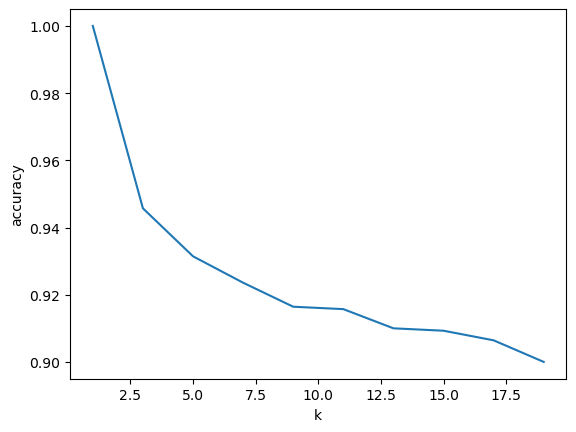

In [51]:
# Import libraries to make the plot

import matplotlib.pyplot as plt

plt.plot(score_df['k'], score_df['accuracy'])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

# Your results should match the results obtained by the library function (In-class exercises) on using the same distance metric